In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
import kagglehub
ryanholbrook_dl_course_data_path = kagglehub.dataset_download('ryanholbrook/dl-course-data')

print('Data source import complete.')

Data source import complete.


In [3]:
hotel = pd.read_csv(f'{ryanholbrook_dl_course_data_path}/hotel.csv')


In [4]:
pd.set_option('display.max_columns', None)

In [5]:
# prompt: make label encoding for hotel , arrival_date_month, meal , country ,market_segment	,distribution_channel	,reserved_room_type	,assigned_room_type	,deposit_type,customer_type,reservation_status

from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_cols = ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
                    'distribution_channel', 'reserved_room_type', 'assigned_room_type',
                    'deposit_type', 'customer_type', 'reservation_status']

for col in categorical_cols:
    le = LabelEncoder()
    hotel[col] = le.fit_transform(hotel[col].astype(str))
    label_encoders[col] = le


In [6]:
hotel.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,2016.156554,5.490544,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.555742,93.333462,4.928101,2.585317,0.031912,0.087118,0.137097,0.989505,1.329399,0.221124,0.124893,86.693382,189.266735,2.321149,2.137323,101.831122,0.062518,0.571363,0.649803
std,0.472181,0.482918,106.863097,0.707476,3.535075,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,1.068598,44.905967,1.266726,0.907578,0.175767,0.844336,1.497437,1.697282,1.878762,0.652306,0.334678,110.774548,131.655015,17.594721,0.577040,50.535790,0.245291,0.792798,0.497776
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2016.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,56.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,69.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,81.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,2.000000,94.575000,0.000000,0.000000,1.000000
75%,1.000000,1.000000,160.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,229.000000,270.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,737.000000,2017.000000,11.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,4.000000,177.000000,7.000000,4.000000,1.000000,26.000000,72.000000,9.000000,11.000000,21.000000,2.000000,535.000000,543.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000


In [7]:
# @title Default title text
hotel['reservation_status_date'] = pd.to_datetime(hotel['reservation_status_date'])

# Extract features
hotel['res_year'] = hotel['reservation_status_date'].dt.year
hotel['res_month'] = hotel['reservation_status_date'].dt.month
hotel['res_day'] = hotel['reservation_status_date'].dt.day
hotel.drop('reservation_status_date', axis=1, inplace=True)

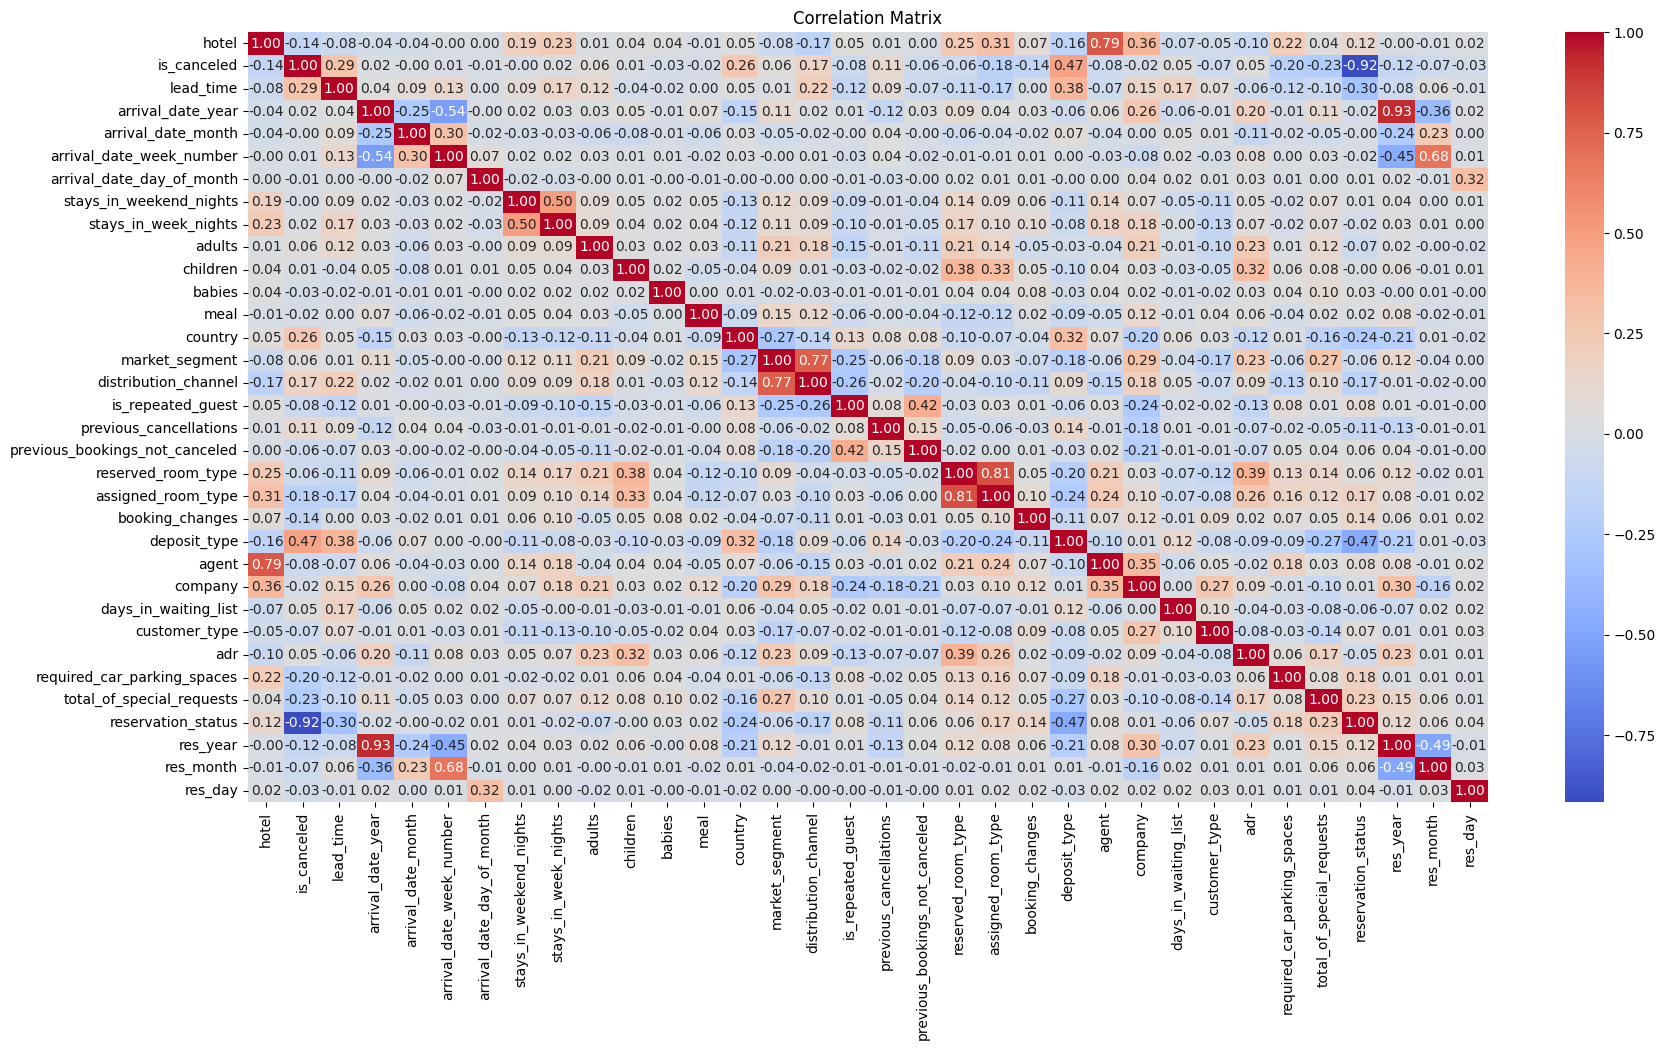

In [8]:
corr_matrix = hotel.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [9]:
hotel[hotel.columns[hotel.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   children  119386 non-null  float64
 1   agent     103050 non-null  float64
 2   company   6797 non-null    float64
dtypes: float64(3)
memory usage: 2.7 MB


In [10]:
hotel = hotel[hotel['children'].notnull() & hotel['country'].notnull()]


In [11]:
hotel[hotel.columns[hotel.isnull().any()]].info()

<class 'pandas.core.frame.DataFrame'>
Index: 119386 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   agent    103048 non-null  float64
 1   company  6797 non-null    float64
dtypes: float64(2)
memory usage: 2.7 MB


In [12]:
hotel['company'].value_counts()

,count
company,
40.0,927
223.0,784
67.0,267
45.0,250
153.0,215
...,...
18.0,1
273.0,1
368.0,1


In [13]:
hotel.nunique().sort_values()

,0
hotel,2
is_canceled,2
is_repeated_guest,2
arrival_date_year,3
deposit_type,3
reservation_status,3
customer_type,4
res_year,4
meal,5
distribution_channel,5


In [14]:
hotel.drop(columns=['company'], inplace=True)

<ipython-input-14-9ad7321120ed>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel.drop(columns=['company'], inplace=True)


In [15]:
hotel['agent'].fillna(hotel['agent'].mean(), inplace=True)


<ipython-input-15-e701d6a07c33>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hotel['agent'].fillna(hotel['agent'].mean(), inplace=True)
<ipython-input-15-e701d6a07c33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hotel['agent'].fillna(hotel['agent'].mean(), inplace=True)


In [17]:
hotel.describe()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,res_year,res_month,res_day
count,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.000000,119386.00000,119386.000000,119386.000000
mean,0.335550,0.370395,104.014801,2016.156593,5.490694,27.165003,15.798553,0.927605,2.500310,1.856390,0.103890,0.007949,0.555760,93.332066,4.928074,2.585270,0.031913,0.087121,0.137102,0.989505,1.329410,0.221131,0.124897,86.694841,2.321227,2.137294,101.833541,0.062520,0.571340,0.649825,2016.09378,6.334068,15.667013
std,0.472184,0.482913,106.863286,0.707456,3.535038,13.605334,8.780783,0.998618,1.908289,0.579261,0.398561,0.097438,1.068611,44.906071,1.266702,0.907556,0.175770,0.844350,1.497462,1.697311,1.878792,0.652315,0.334683,102.916510,17.595011,0.577028,50.534664,0.245295,0.792798,0.497770,0.71529,3.346394,8.778325
min,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,2014.00000,1.000000,1.000000
25%,0.000000,0.000000,18.000000,2016.000000,2.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,56.000000,4.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,2.000000,69.290000,0.000000,0.000000,0.000000,2016.00000,3.000000,8.000000
50%,0.000000,0.000000,69.000000,2016.000000,6.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,81.000000,5.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,0.000000,2.000000,94.590000,0.000000,0.000000,1.000000,2016.00000,6.000000,16.000000
75%,1.000000,1.000000,160.000000,2017.000000,8.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,135.000000,6.000000,3.000000,0.000000,0.000000,0.000000,3.000000,3.000000,0.000000,0.000000,152.000000,0.000000,2.000000,126.000000,0.000000,1.000000,1.000000,2017.00000,9.000000,23.000000
max,1.000000,1.000000,737.000000,2017.000000,11.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,4.000000,177.000000,6.000000,4.000000,1.000000,26.000000,72.000000,9.000000,11.000000,21.000000,2.000000,535.000000,391.000000,3.000000,5400.000000,8.000000,5.000000,2.000000,2017.00000,12.000000,31.000000


In [18]:
X = hotel.copy()
y = X.pop('is_canceled')

In [19]:
y.value_counts()

,count
is_canceled,
0,75166
1,44220


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
# prompt: scale X_train and X_test

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [22]:
model = Sequential()
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [25]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9999 - loss: 7.7737e-04 - val_accuracy: 0.9999 - val_loss: 0.0067
Epoch 2/10
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9999 - loss: 7.0543e-04 - val_accuracy: 0.9999 - val_loss: 0.0099
Epoch 3/10
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 1.9322e-05 - val_accuracy: 0.9999 - val_loss: 0.0107
Epoch 4/10
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 1.0000 - loss: 2.0768e-06 - val_accuracy: 0.9999 - val_loss: 0.0110
Epoch 5/10
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 1.0000 - loss: 6.8212e-07 - val_accuracy: 0.9999 - val_loss: 0.0118
Epoch 6/10
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 1.0000 - loss: 6.0306e-05 - val_accuracy: 0.9999 - val_loss: 0.0085
Epoch 7/10
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 1.0000 - loss: 2.6683e-04 - val_accuracy: 0.9999 - val_loss: 0.0082
Epoch 8/10
2687/2687 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - ac

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

In [ ]:
predictions = model.predict(X_test)
